In [ ]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
import imghdr

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

<ipython-input-1-36ed725f20c7>:6: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
# import the data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd 'drive/My Drive/CNN/data'

/content/drive/My Drive/CNN/data


In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
import os
data_path = '/content/drive/My Drive/CNN/data'
folders = os.listdir(data_path)
print("Subfolders:", folders)

Subfolders: ['happy', 'sad']


In [ ]:
dummy_img = cv2.imread('/content/drive/My Drive/CNN/data/happy/_happy_jumping_on_beach-40815.jpg')
dummy_img.shape

(213, 320, 3)

In [ ]:
# cv2.imread('/content/drive/My Drive/CNN/data/happy/_happy_jumping_on_beach-40815.jpg')

In [ ]:
# (213, 320, 3)
# 213 pixel height
# 320 pixel width
# 3 channels (RGB)

In [ ]:
# plt.imshow(dummy_img)

In [ ]:
for image_class in folders:
  for image in os.listdir(os.path.join(data_path, image_class)):
    image_path = os.path.join(data_path, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))


In [ ]:
# tf.keras.utils.image_dataset_from_directory??

In [ ]:
# the directory exists before loading:
if os.path.exists(data_path):
    print("Directory exists, proceeding to load.")
else:
    print("Directory does NOT exist. Check the path again.")

Directory exists, proceeding to load.


In [ ]:
# load the data
data = tf.keras.utils.image_dataset_from_directory(data_path)

Found 305 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

In [ ]:
# len(batch)

# images represent as numpy arrays
# batch 0 happy
# batch 1 sad
# batch[0].shape
# batch[1]

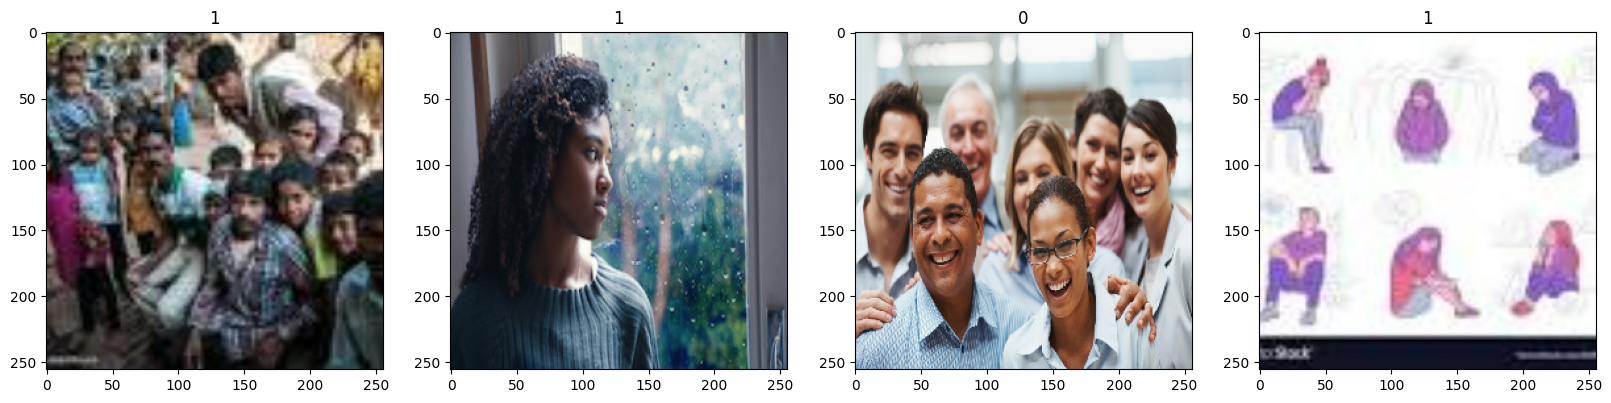

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [ ]:
# scale the data
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[0.74524355, 0.60798866, 0.45896906],
          [0.74945617, 0.6122013 , 0.46318167],
          [0.7536688 , 0.6164139 , 0.4673943 ],
          ...,
          [0.43747702, 0.3668888 , 0.3276731 ],
          [0.43529412, 0.3647059 , 0.3254902 ],
          [0.43529412, 0.3647059 , 0.3254902 ]],
 
         [[0.73393935, 0.59668446, 0.44766486],
          [0.7359911 , 0.5987362 , 0.4497166 ],
          [0.74020374, 0.60294884, 0.45392922],
          ...,
          [0.4393048 , 0.36871654, 0.32950085],
          [0.4375383 , 0.36695006, 0.32773438],
          [0.4375383 , 0.36695006, 0.32773438]],
 
         [[0.71760875, 0.58035386, 0.42908242],
          [0.7181707 , 0.5809158 , 0.42964435],
          [0.7233839 , 0.586129  , 0.43485755],
          ...,
          [0.44067097, 0.3700827 , 0.33086702],
          [0.4392157 , 0.36862746, 0.32941177],
          [0.4392157 , 0.36862746, 0.32941177]],
 
         ...,
 
         [[0.82480085, 0.805193  , 0.7934283 ],
          [0.82901

In [ ]:
# split the data
len(data)

10

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
# train_size

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
# len(test)

In [ ]:
# learning model


In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the process
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.4929 - loss: 1.2193 - val_accuracy: 0.4375 - val_loss: 0.7109
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.5231 - loss: 0.6889 - val_accuracy: 0.5000 - val_loss: 0.6766
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.5699 - loss: 0.6283 - val_accuracy: 0.7500 - val_loss: 0.5378
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.6868 - loss: 0.5762 - val_accuracy: 0.9375 - val_loss: 0.4722
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.8423 - loss: 0.4789 - val_accuracy: 0.5312 - val_loss: 0.8734
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 0.8219 - loss: 0.4127 - val_accuracy: 0.9062 - val_loss: 0.3231
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.9056 - loss: 0.3107 - val_accuracy: 0.9375 - val_loss: 0.1884
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.9514 - loss: 0.2183 - val_accuracy: 0.9219 - val_loss: 0.1618
Epoch 9/

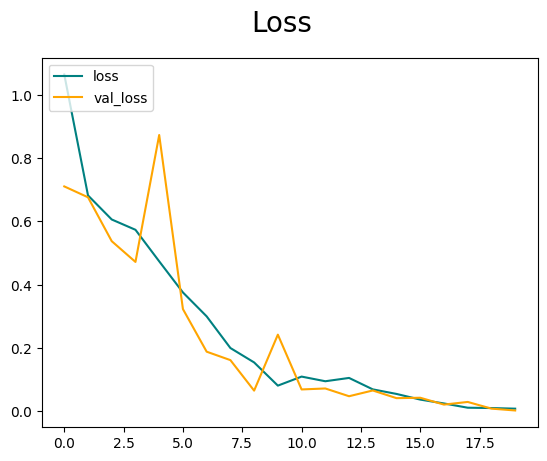

In [ ]:
# peformance plot
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

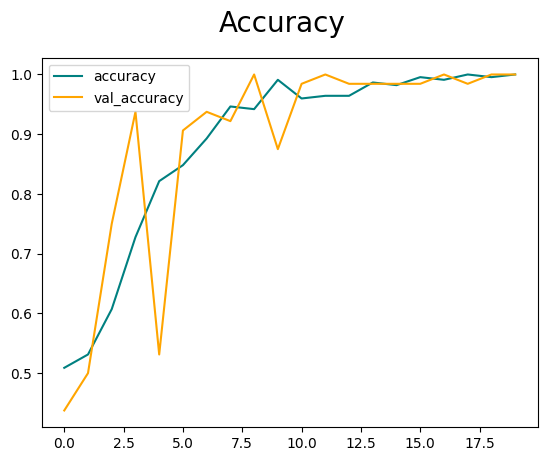

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


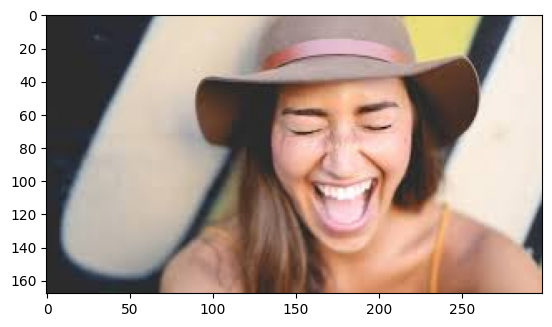

In [ ]:
# testing
img = cv2.imread('happy test.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

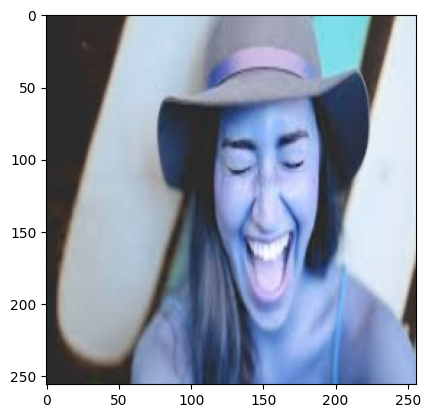

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


In [ ]:
yhat

array([[0.04588297]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [ ]:
# saving the model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
!ls '/content/drive/My Drive/CNN'

 data  'Image Classifier.ipynb'


In [ ]:
!find '/content/drive/My Drive/CNN' -name "*.h5"

/content/drive/My Drive/CNN/data/models/imageclassifier.h5


In [ ]:
from tensorflow.keras.models import load_model

model_path = '/content/drive/My Drive/CNN/data/models/imageclassifier.h5'
new_model = load_model(model_path)

In [ ]:
import os

if os.path.exists(model_path):
    new_model = load_model(model_path)
    print("Model loaded successfully!")
else:
    print("Model file not found. Check the path.")

Model loaded successfully!


In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


array([[0.04588297]], dtype=float32)

In [ ]:
from google.colab import runtime
runtime.unassign()